George Bennett

some of the code in this lab was copied from other students. There githubs can be found here: <br>
https://github.com/sdrvsx/Module-4-Project

# Introduction

This is my module four project for flat iron school. It deals with time series analysis on real estate values. The data comes from zillow.com.

# Objective

Deturmine the best five zipcodes to invest in. My approach will simply looking to see which zipcodes' real estate values are predicted to increase the most.

# Methodology

I will be using ARIMA models and I will be following the OSEMN data-science process.

#### import libraries

In [68]:
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')

# Step 1: Obtain

I will load the data from a csv file into a pandas dataframe

In [69]:
data = pd.read_csv('zillow_data.csv')
data.head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


# Step 2: Scrub

#### 2.1 Deal with duplicates and NaNs

In [71]:
data.RegionName.nunique() == len(data)

True

In [72]:
# check for nulls in RegionName
data.RegionName.isna().sum()

0

In [73]:

# check for nulls in the time intervals
data[data.columns[7:]].isna().sum()[:4]

1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
dtype: int64

I will leave the nans in the time columns for now.

##### 2.3 Select zipcodes to model 

I will start by selecting 20 zipcodes which have grown the most in the last five years

In [74]:
data['growth'] = (data['2018-04'] - data['2013-04']) / data['2013-04']

In [75]:
query = """SELECT RegionName FROM data ORDER BY growth DESC LIMIT 20"""
zipcodes = list(ps.sqldf(query, locals()).RegionName)

In [76]:
zipcodes

[80216,
 94601,
 48240,
 94590,
 33705,
 37210,
 33460,
 15201,
 11216,
 37207,
 33461,
 33435,
 33415,
 32807,
 33030,
 34207,
 33056,
 94606,
 30316,
 85035]

#### 2.2 Melt the dataframe

I will melt the dataframe changing it from wide format to long format

In [77]:
def melt_data(df):
    melted = pd.melt(df, 
                     id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
                       'SizeRank', 'growth'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted.set_index('time', inplace=True)
    return melted

In [78]:
data = melt_data(data)

In [79]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,growth,value
time,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,0.260827,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.533842,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.283158,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,0.258788,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.070485,77300.0


#### 2.4 Create seperate time series

I will create a dictionary to organize data for each zipcode. I will start off by entering a time series into the dictionary for each zipcode. This dictionary will come in handy later.

In [80]:
zip_dict = {}
for zipcode in zipcodes:
    zip_dict.update({zipcode : {'time_series' : data[data.RegionName == zipcode].value}})

# Step 3: Explore 

#### 3.1 Plot each time series

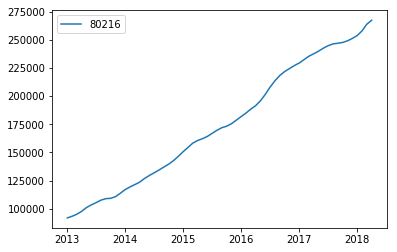

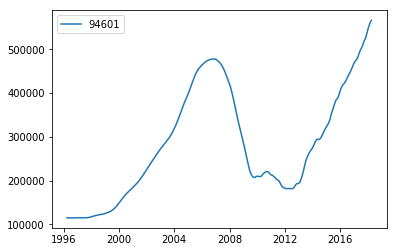

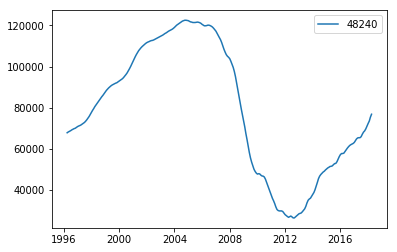

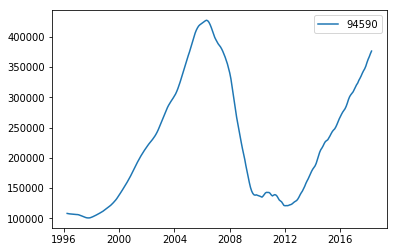

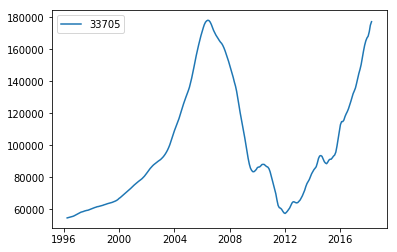

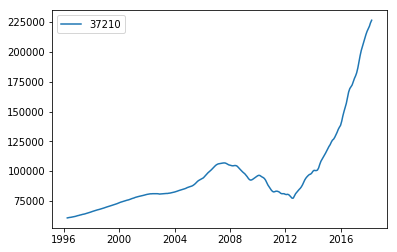

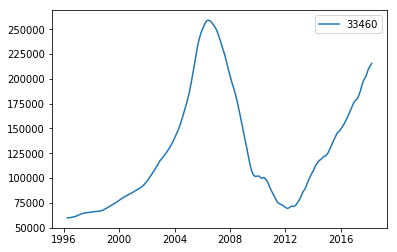

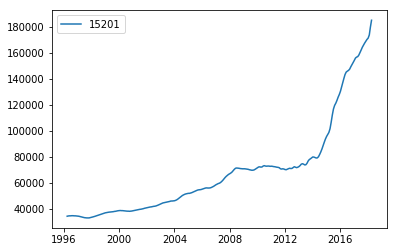

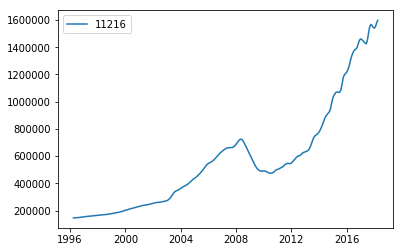

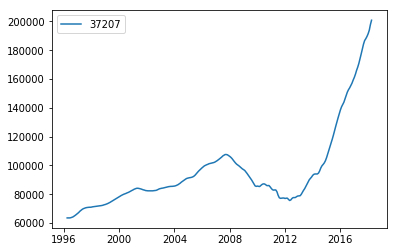

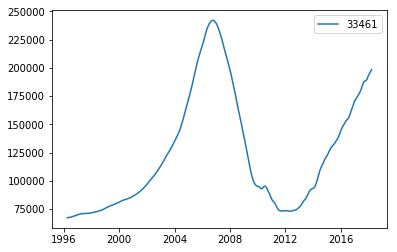

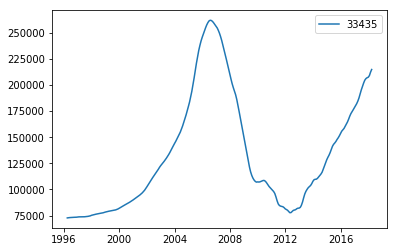

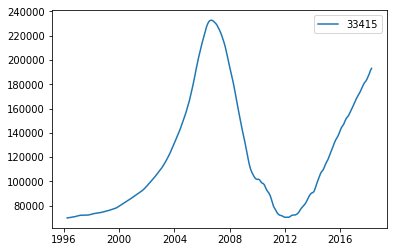

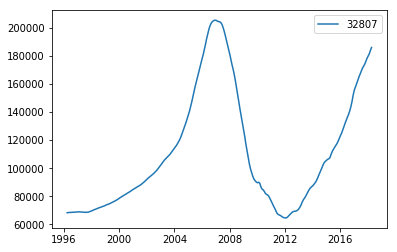

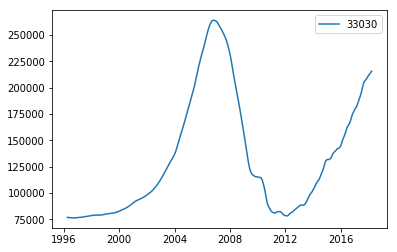

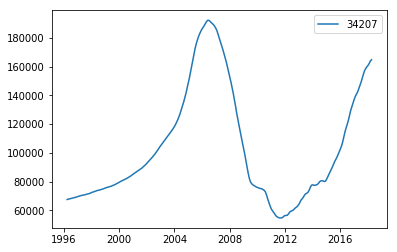

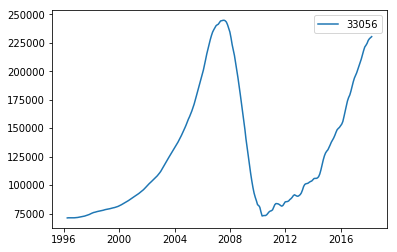

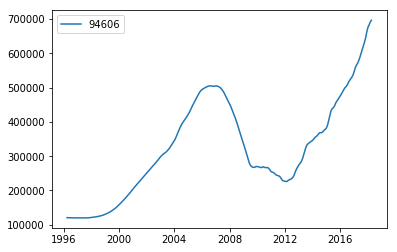

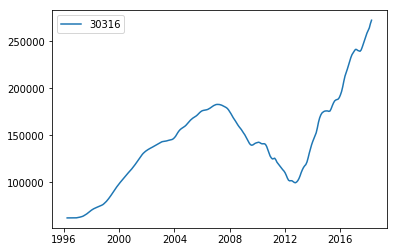

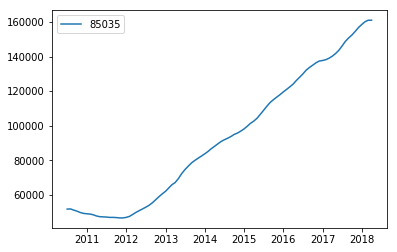

In [81]:
for key in zip_dict.keys():
    plt.plot(zip_dict[key]['time_series'], label=key)
    plt.legend()
    plt.show()

#### 3.1 Seasonal Decomposition

Here I will seasonaly decompose each zipcode's time series. I will check to see if the residuals are stationary.

Zipcode: 80216


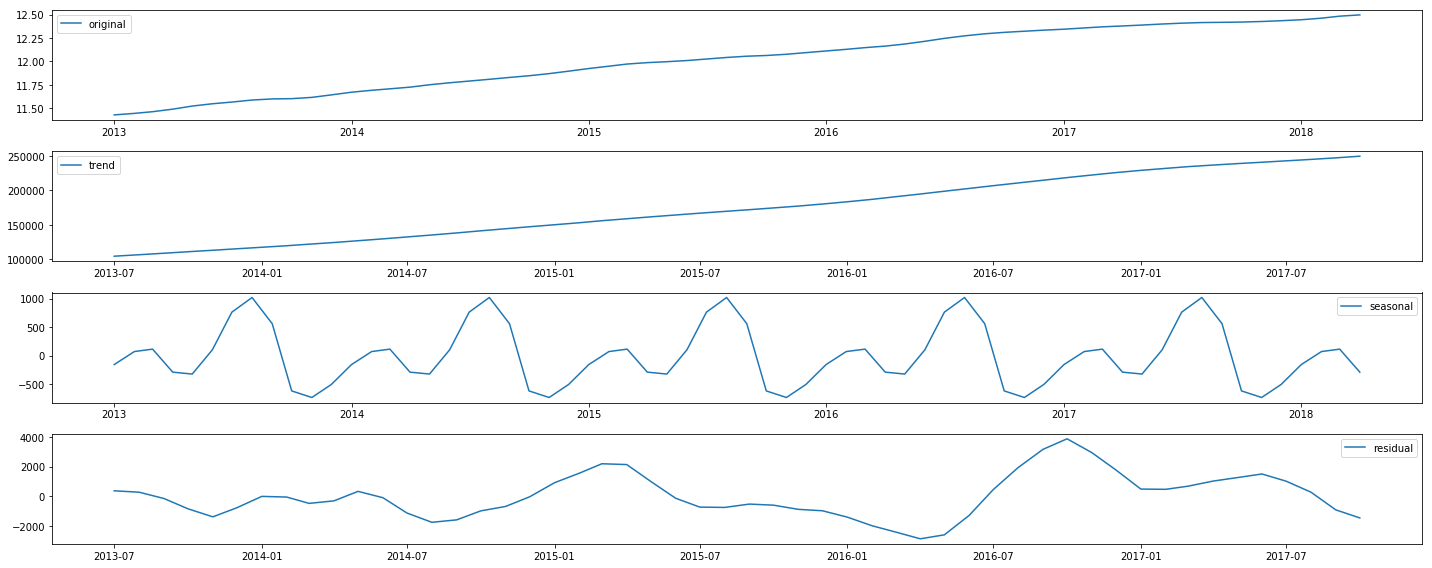

Is P-value for residuals below alpha of 0.05?   False




Zipcode: 94601


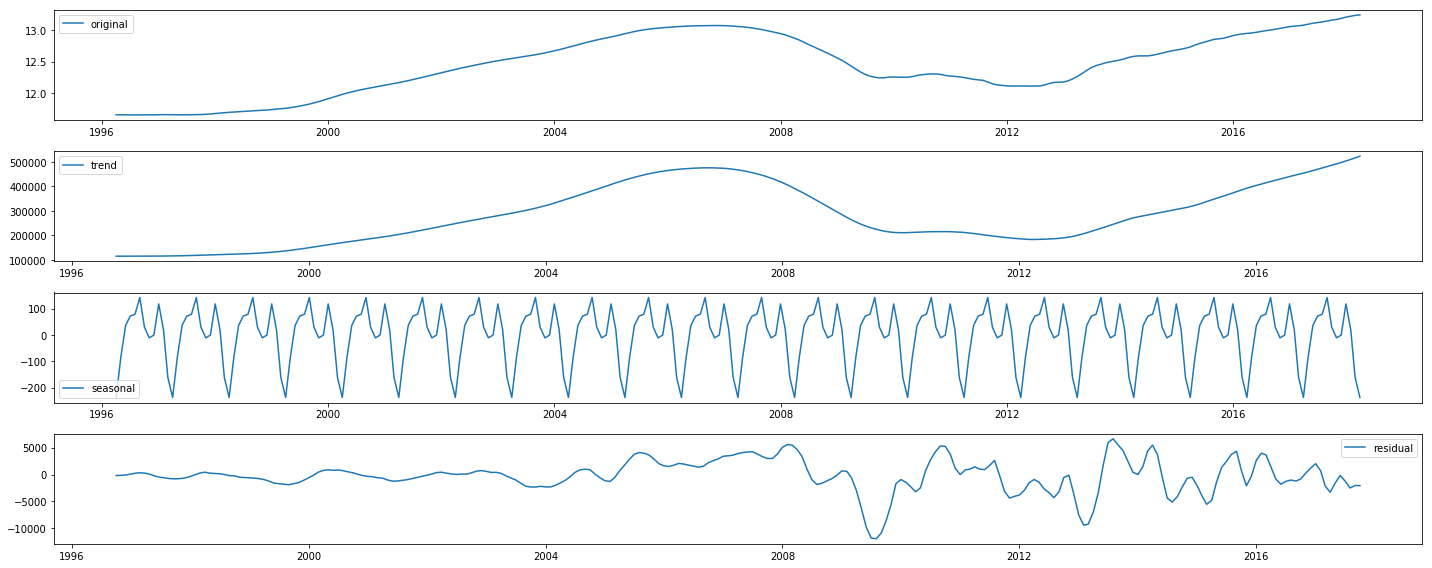

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 48240


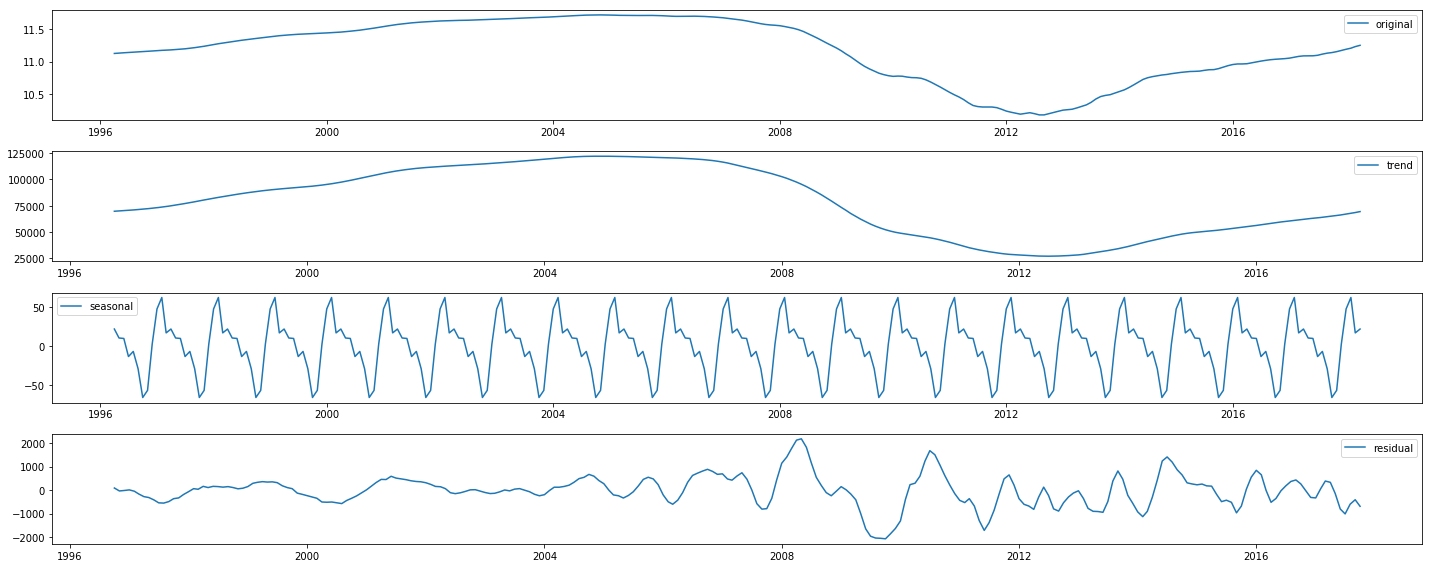

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 94590


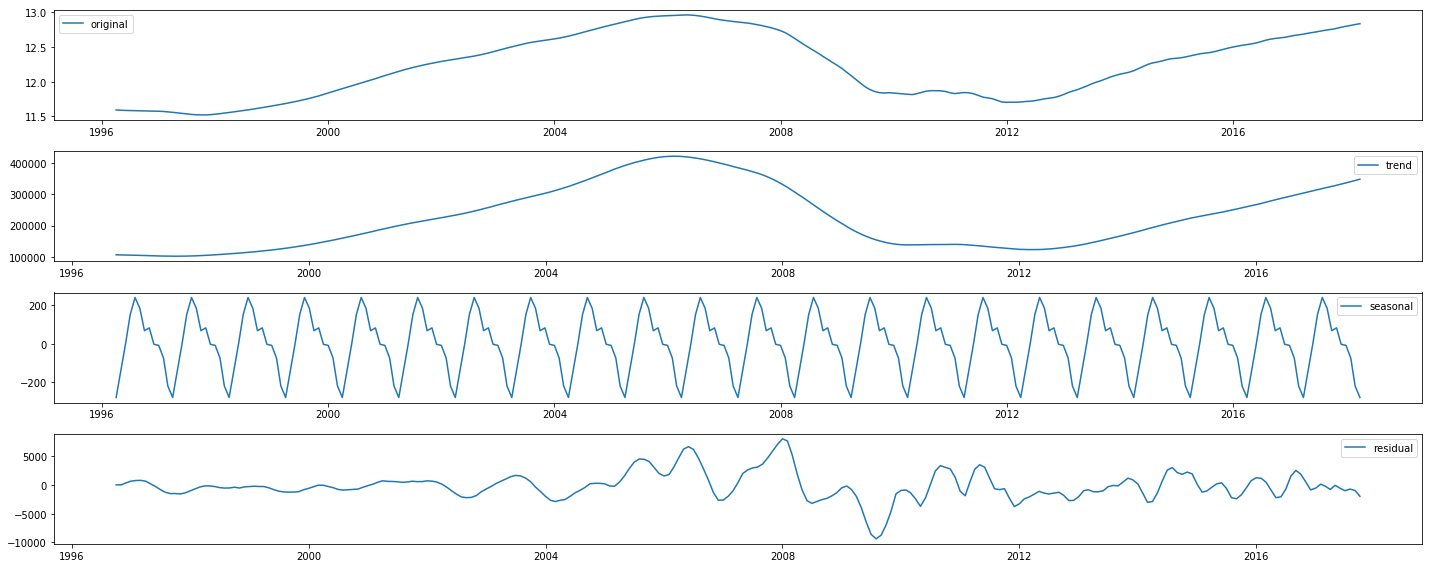

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33705


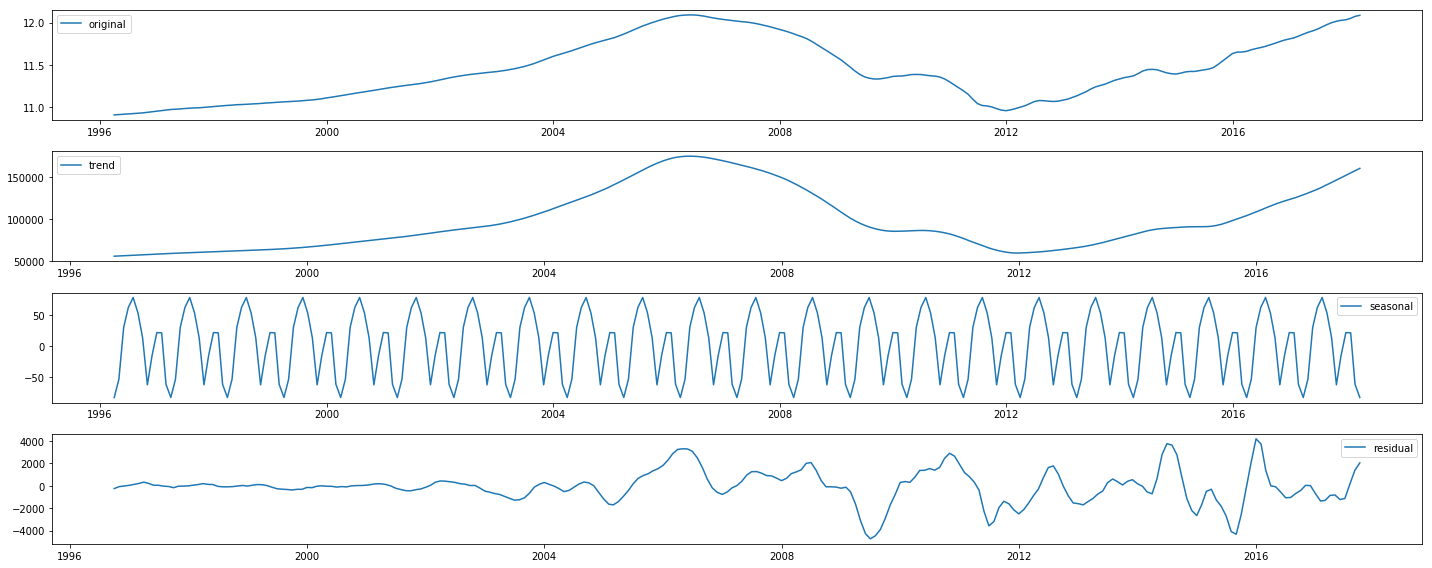

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 37210


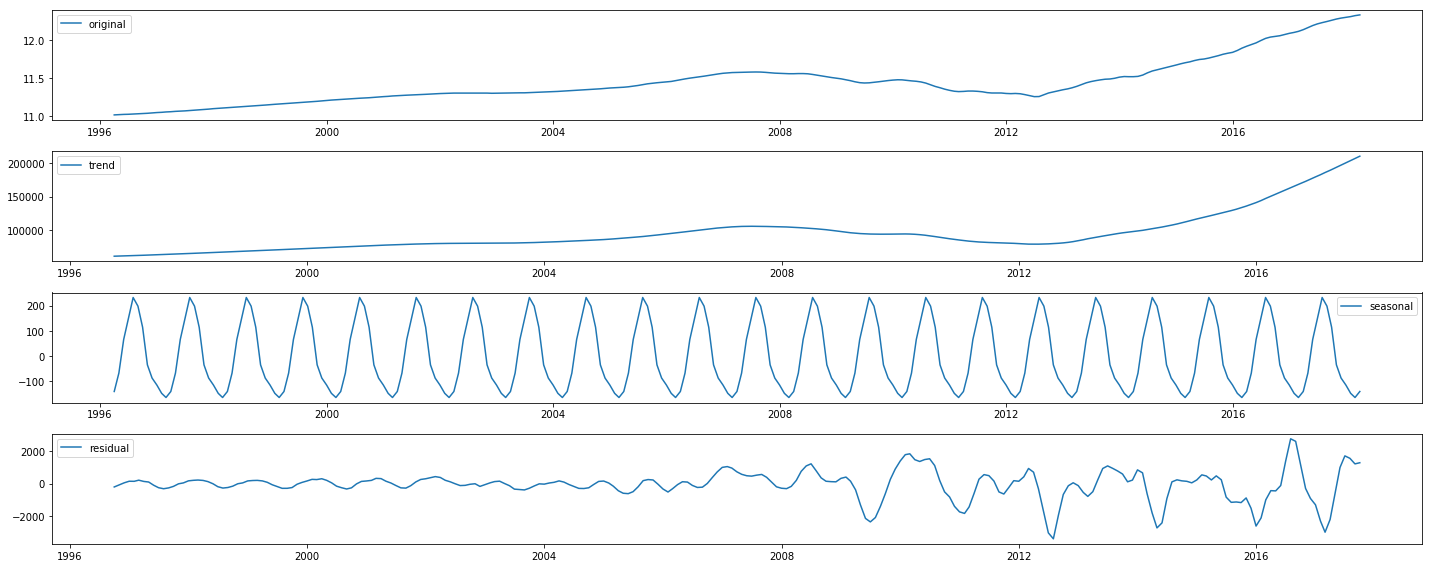

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33460


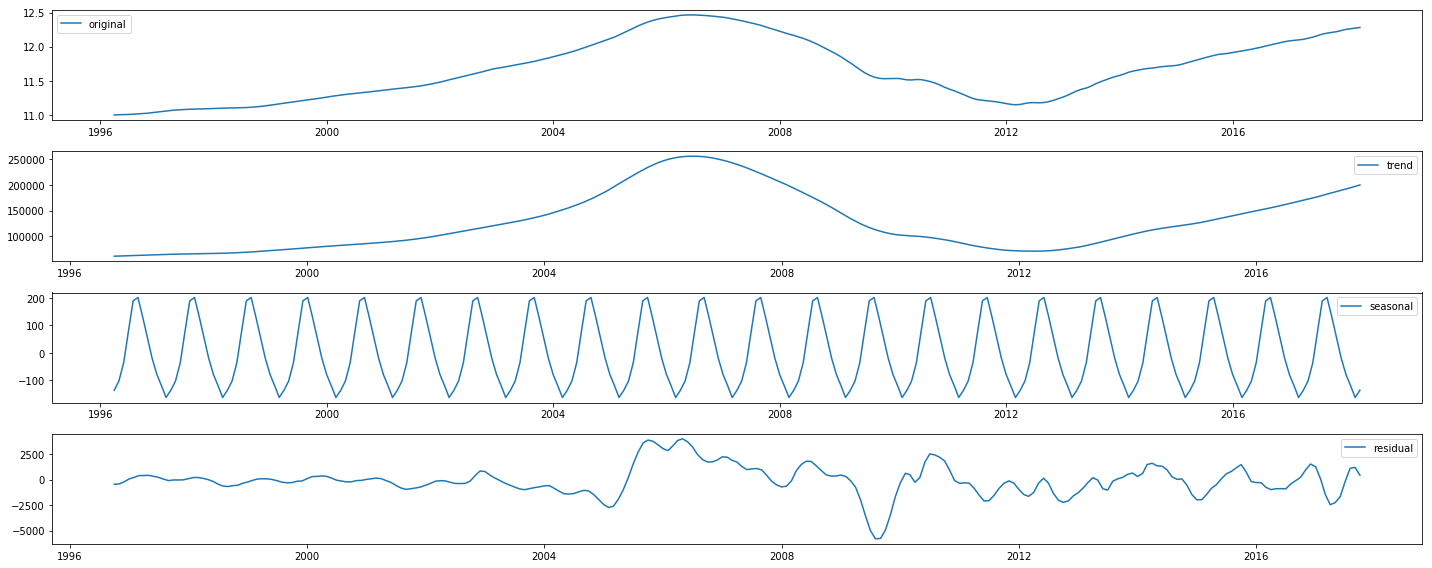

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 15201


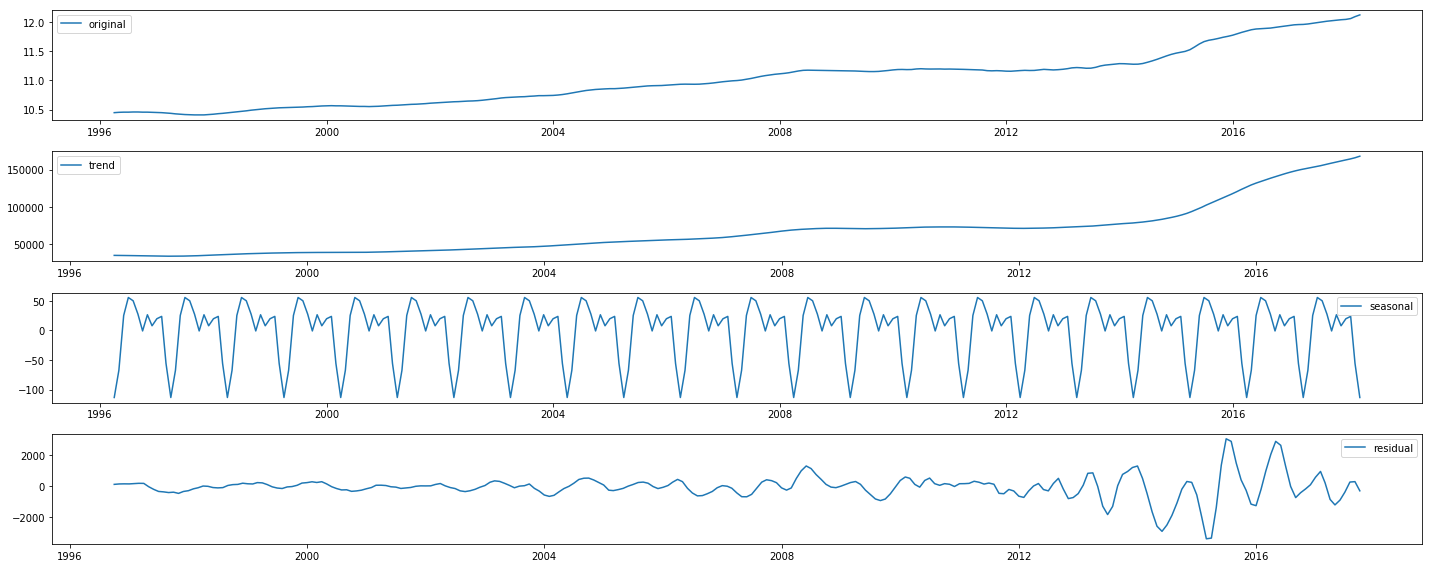

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 11216


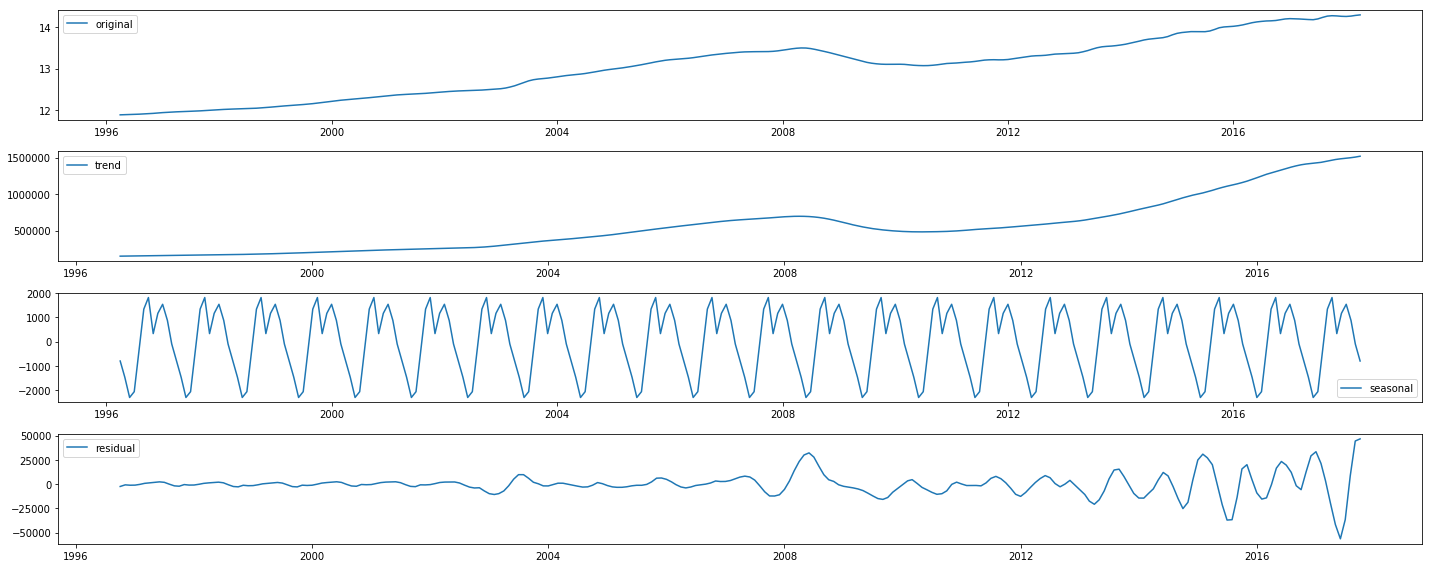

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 37207


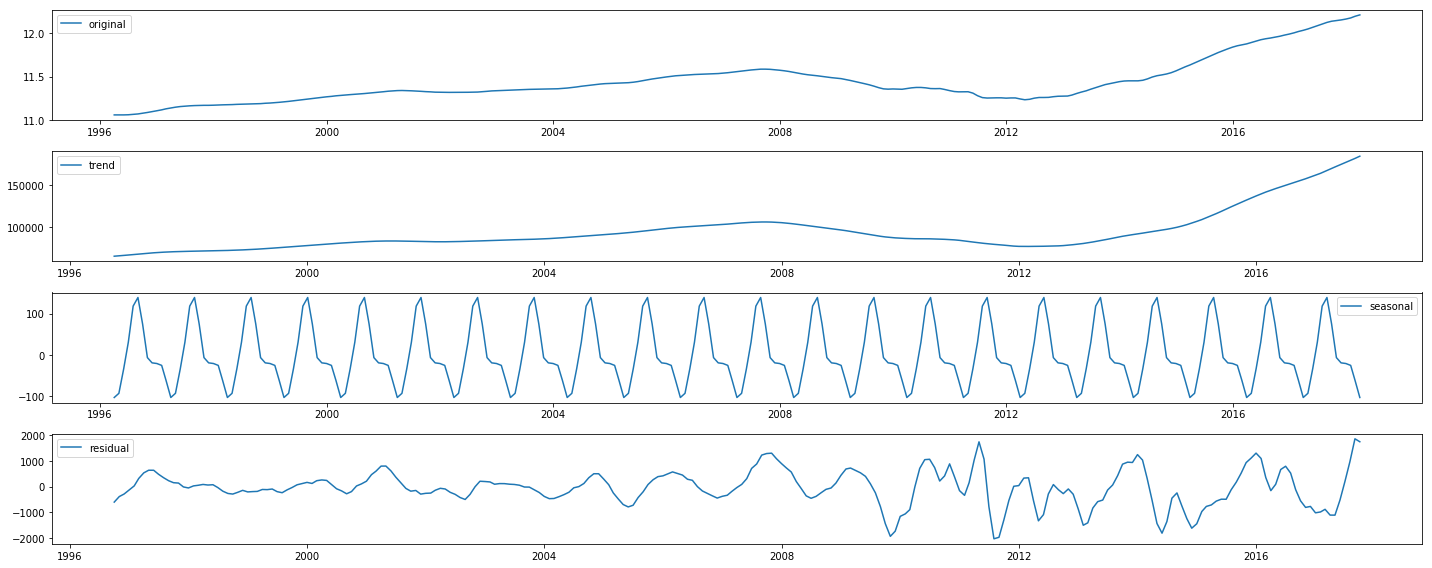

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33461


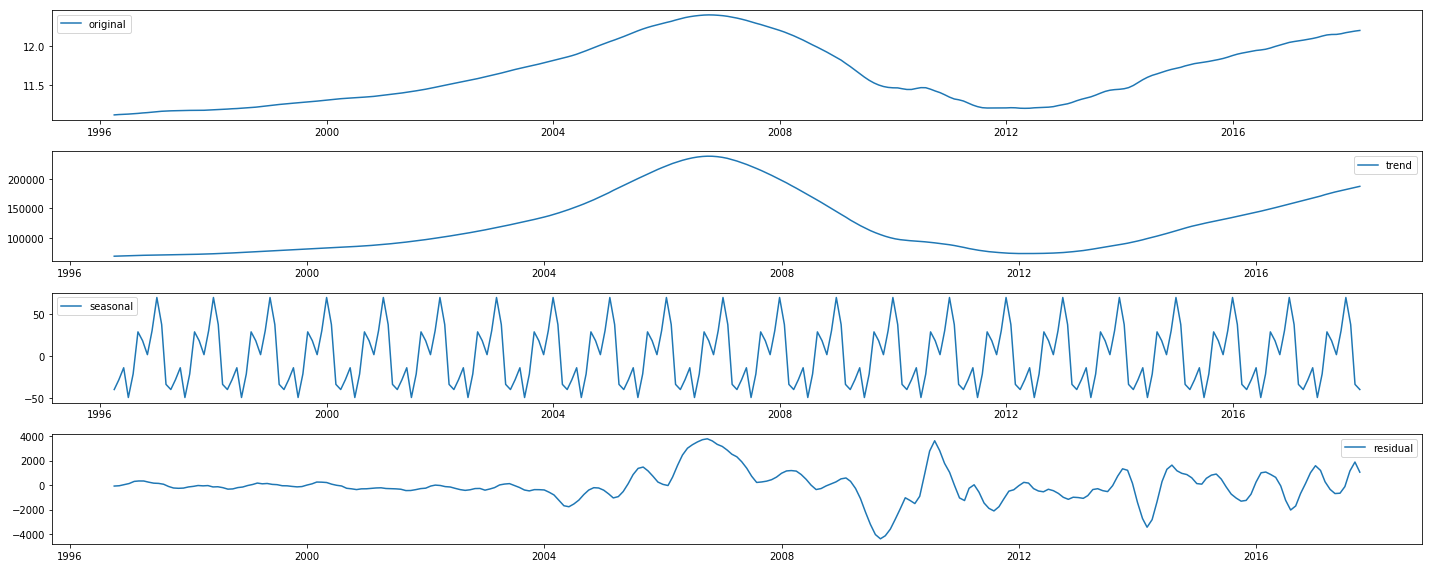

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33435


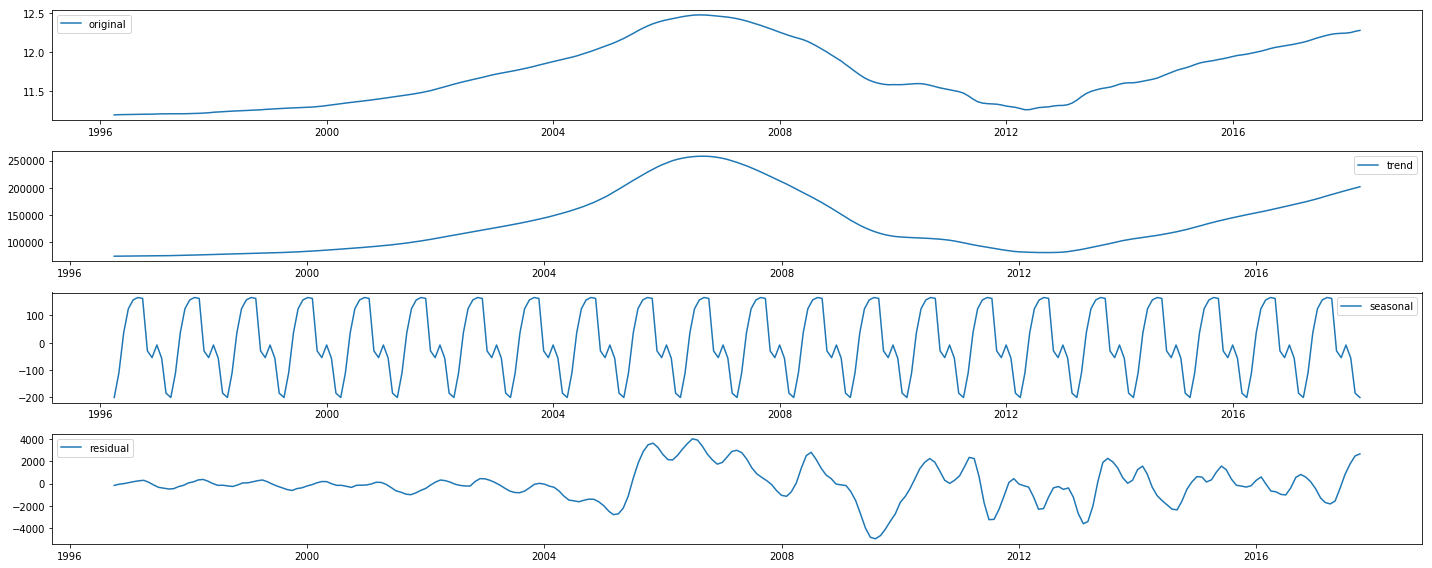

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33415


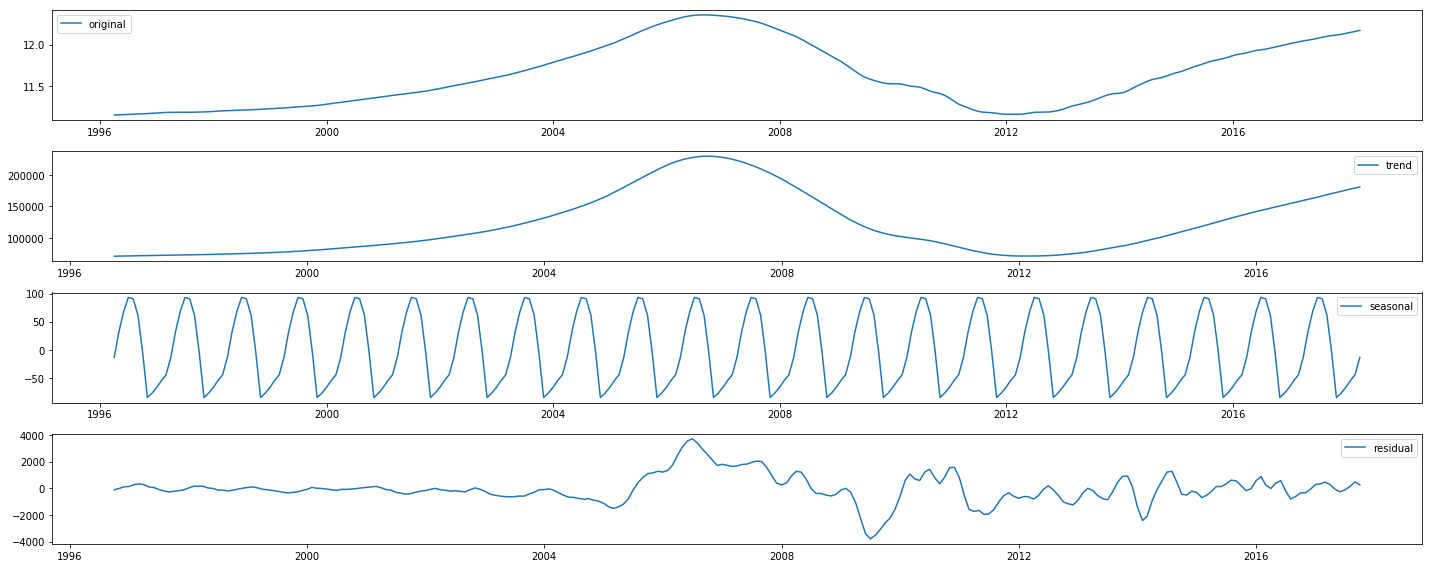

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 32807


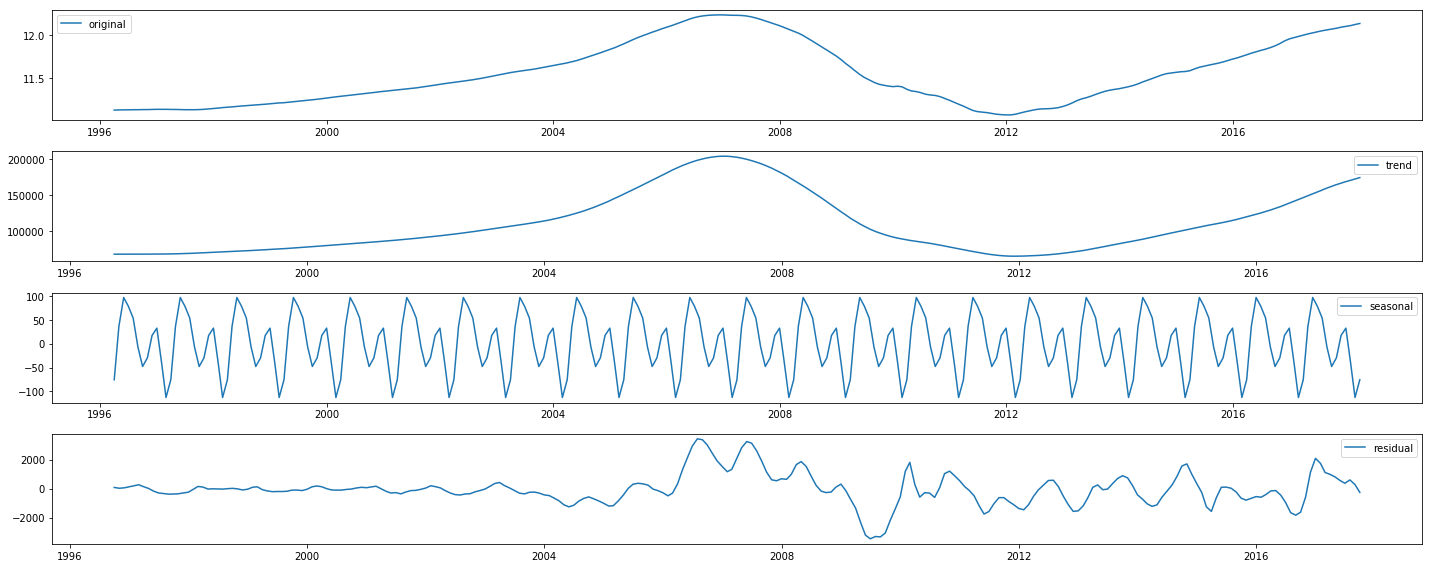

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33030


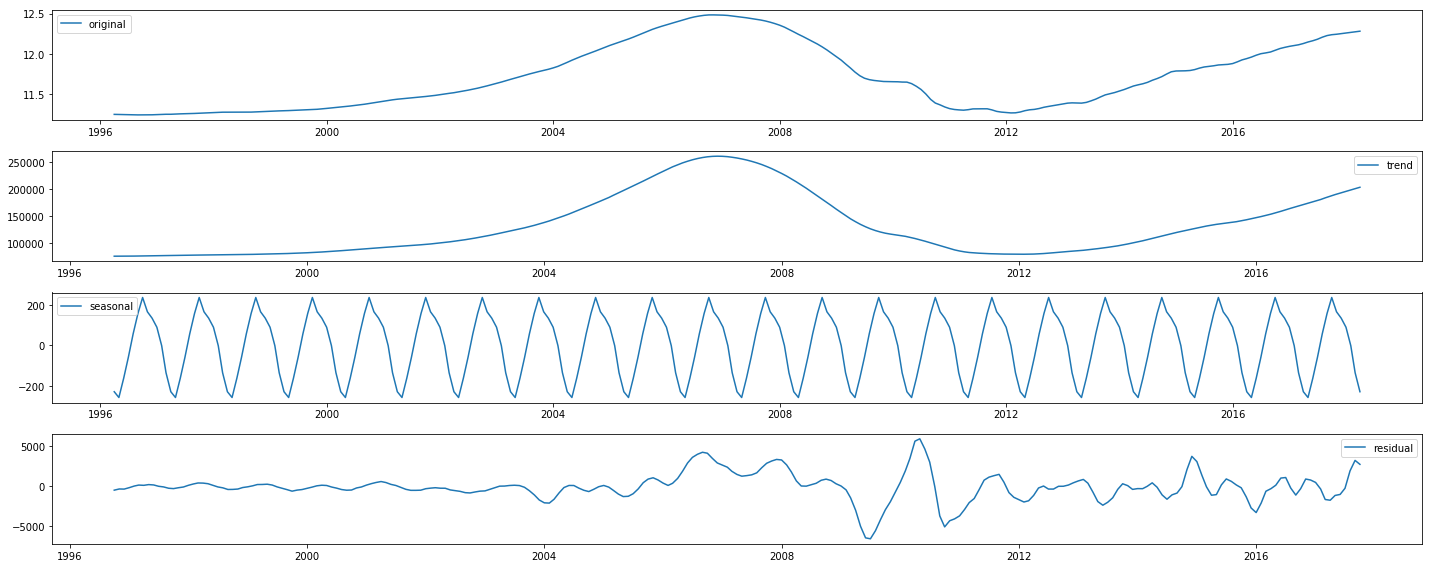

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 34207


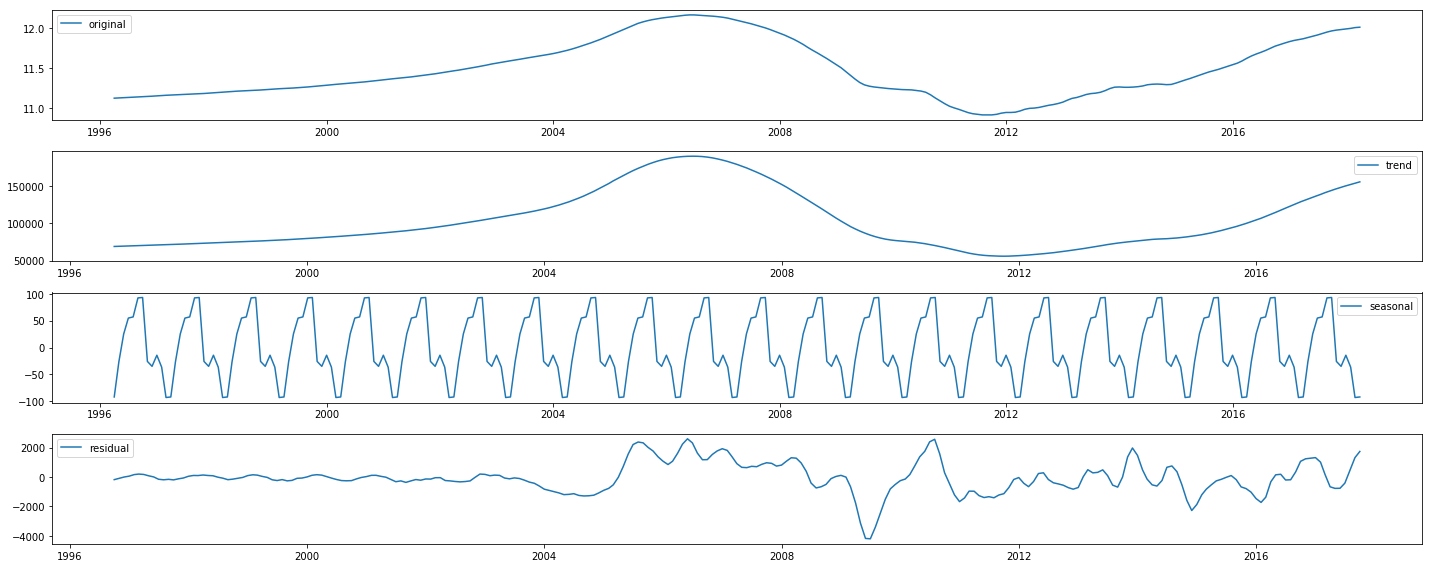

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 33056


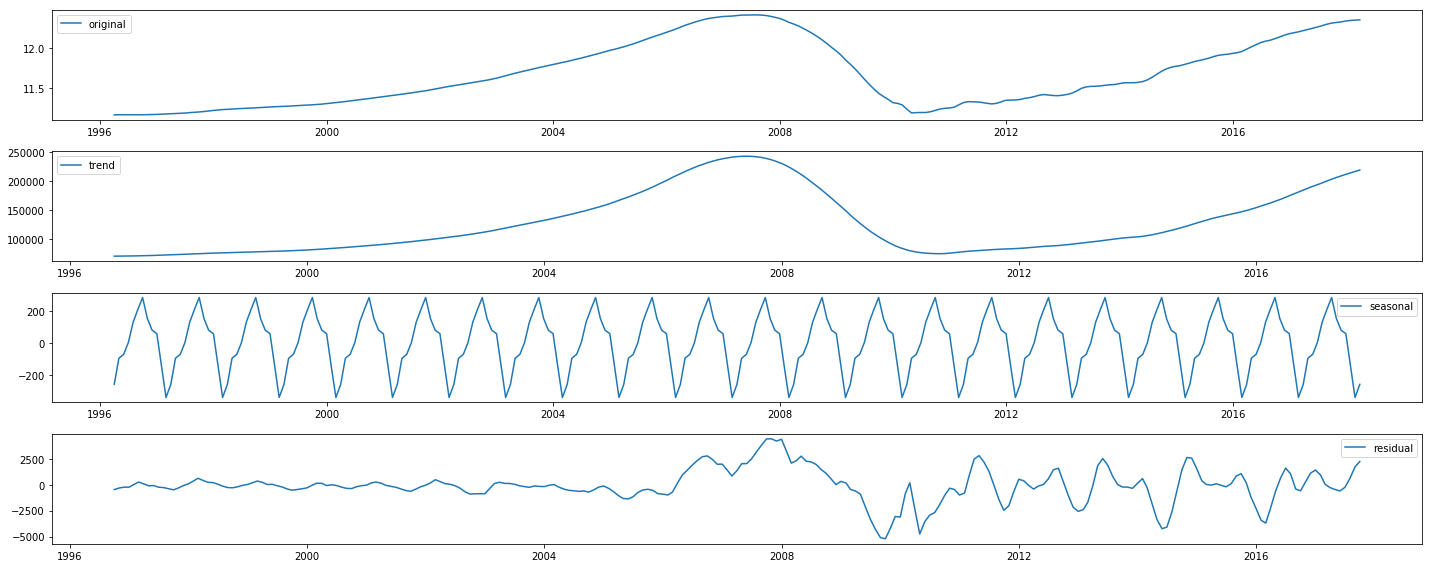

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 94606


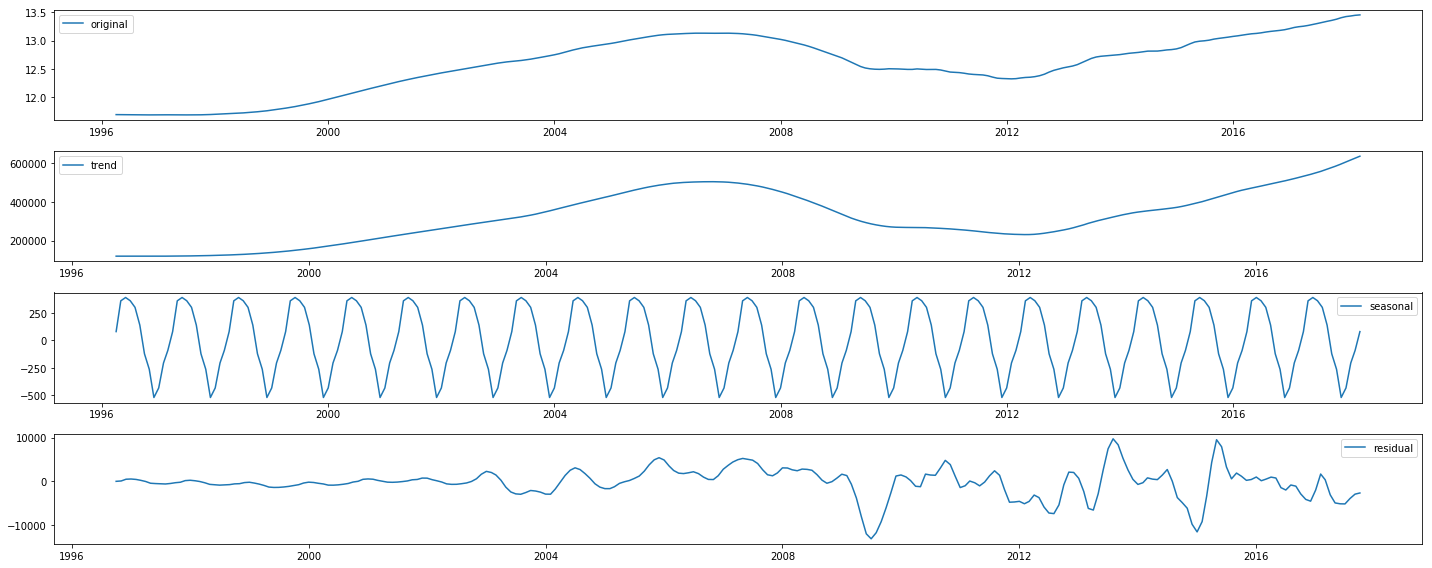

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 30316


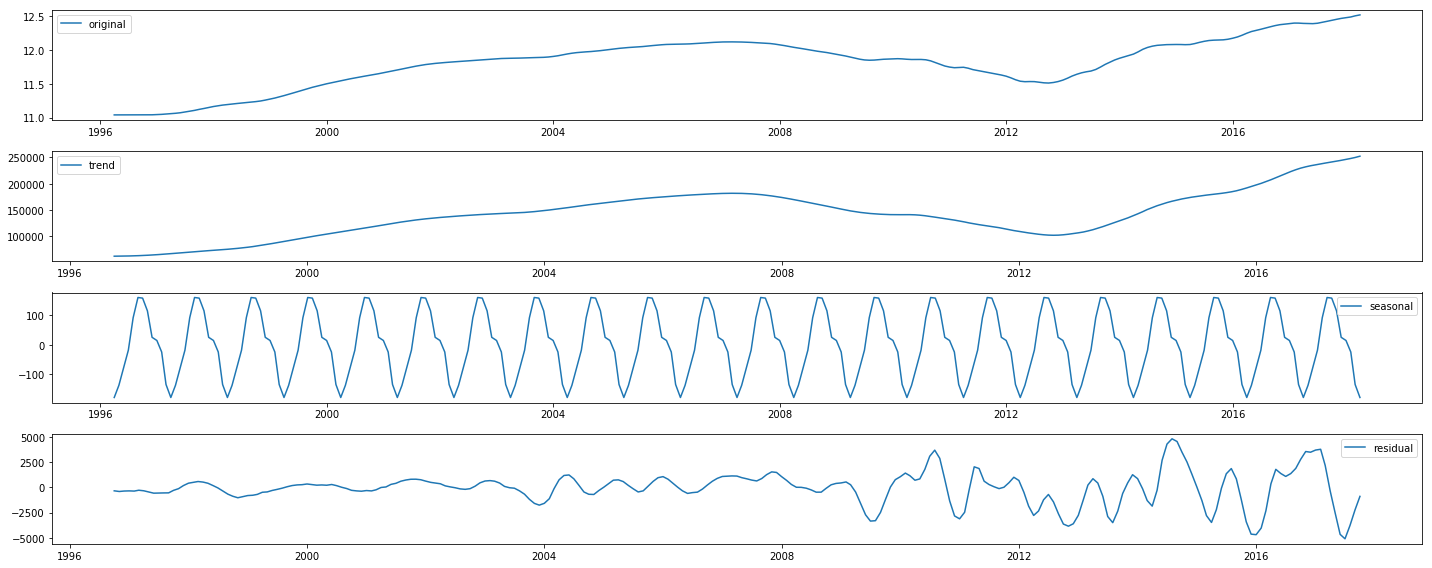

Is P-value for residuals below alpha of 0.05?   True




Zipcode: 85035


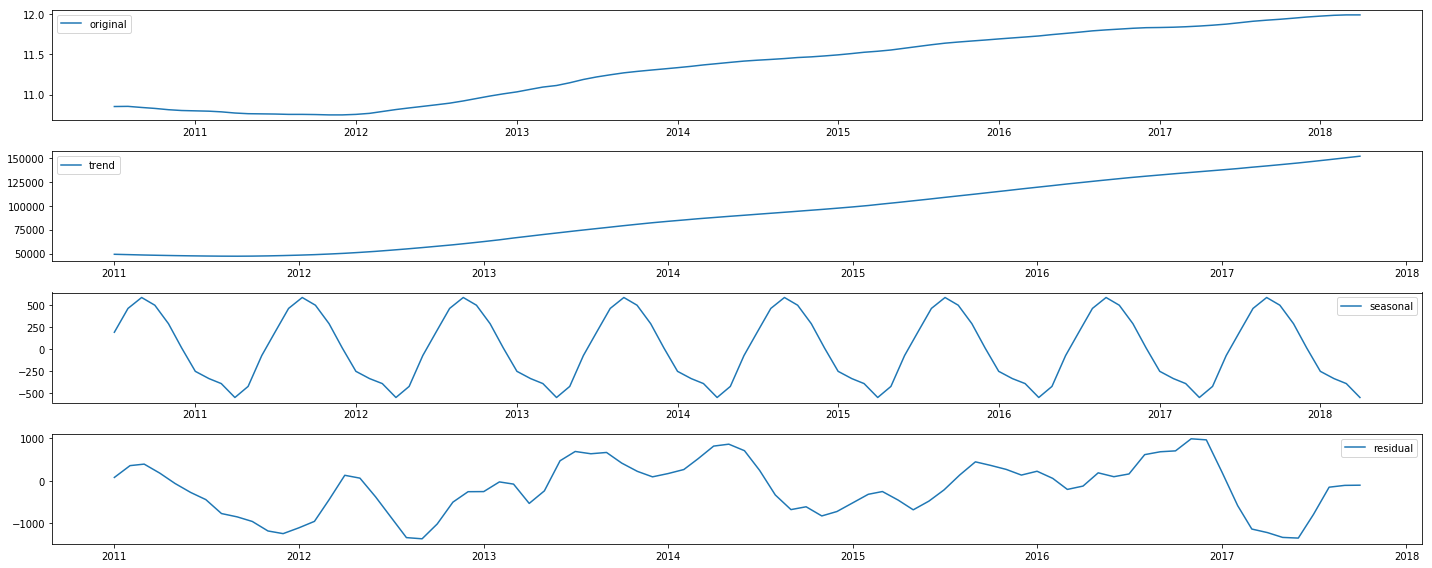

Is P-value for residuals below alpha of 0.05?   False






In [82]:
# this cell was copied from https://github.com/sdrvsx/Module-4-Project

for key in zip_dict.keys():
    
    ts = zip_dict[key]['time_series']
    decomposition = seasonal_decompose(ts)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    zip_dict[key]['resid'] = residual
    
    print('Zipcode: ' + str(key))
    plt.figure(figsize=(20, 8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='original')
    plt.legend()
    plt.subplot(412)
    plt.plot(trend, label='trend')
    plt.legend()
    plt.subplot(413)
    plt.plot(seasonal, label='seasonal')
    plt.legend()
    plt.subplot(414)
    plt.plot(residual, label='residual')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    result = adfuller(residual.dropna())
    print('Is P-value for residuals below alpha of 0.05?   {}'.format(result[1]<0.05))
    print('\n\n\n')
    

the residuals for zipcode 80216 and zipcode 85035 are not stationary so I will drop these zipcodes

In [83]:
del zip_dict[80216]
del zip_dict[85035]

# Step 4: Model

#### 4.1 Check for stationarity. Deturmine if differenceing can make the data stationary

I need to make sure that if the data is not stationary, that I can make it stationary by differenceing one, two, or three times.

In [84]:
def DF_Test(time_series):
    results = adfuller(time_series)
    if results[1] > 0.05:
        print('not stationary')
    else: print('stationary')
    return results[1]

In [85]:
for key in zip_dict.keys():
    ts = zip_dict[key]['time_series']
    DF_Test(ts)

not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
stationary
not stationary
not stationary
not stationary
not stationary
not stationary


In [86]:
for key in zip_dict.keys():
    zip_dict[key]['diff'] = zip_dict[key]['time_series'].diff().dropna()

In [87]:
for key in zip_dict.keys():
    ts = zip_dict[key]['diff']
    DF_Test(ts)

not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
not stationary
stationary
not stationary
not stationary


In [88]:
for key in zip_dict.keys():
    zip_dict[key]['diff2'] = zip_dict[key]['time_series'].diff().dropna().diff().dropna()

In [89]:
for key in zip_dict.keys():
    ts = zip_dict[key]['diff2']
    DF_Test(ts)

stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary
stationary


So all of the time series can be made stationary

#### 4.2 Train test split

Here I will perform a simple train test split.

In [90]:
for key in zip_dict.keys():
    zip_dict[key]['train'] = zip_dict[key]['time_series'][:255]
    zip_dict[key]['test'] = zip_dict[key]['time_series'][255:]

#### 4.3 ARIMA modeling

Here is the function I made for ARIMA modeling. It automatically grid searches to find the best parameters for p, d, and q.

In [91]:
def model_ARIMA(train):
    
    p = d = q = range(0,3) # p, d, and q can be anywhere from 0 to 2
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    
    combs = {} # stores aic and combination pairs
    aics = [] # stores aics
    
    for comb in pdq:
        try:
            model = ARIMA(train, order=comb) # create all possible models
            model = model.fit()
            combs.update({model.aic : comb}) # store data
            aics.append(model.aic)
        except:
            continue
            
    best_aic = min(aics)
    
    return ARIMA(train, order=combs[best_aic])

I store each model in the dictionary

In [92]:
for key in zip_dict.keys():
    zip_dict[key]['model'] = model_ARIMA(zip_dict[key]['train']).fit()

#### Forecasting

Here I create a forcast for the future values of each zipcode. I then plot each zipcode and there predictions

In [93]:
X = pd.date_range(start=pd.to_datetime('2017-06'), periods=40, freq='M')

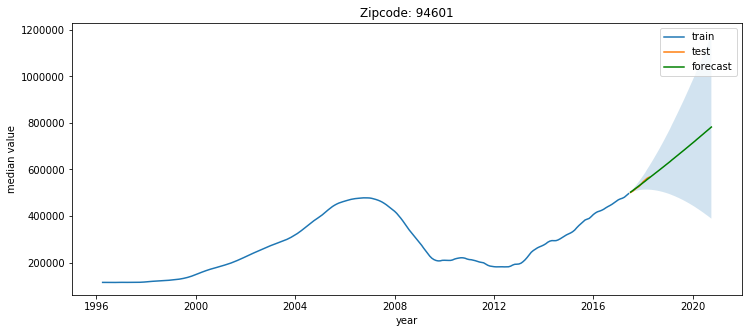

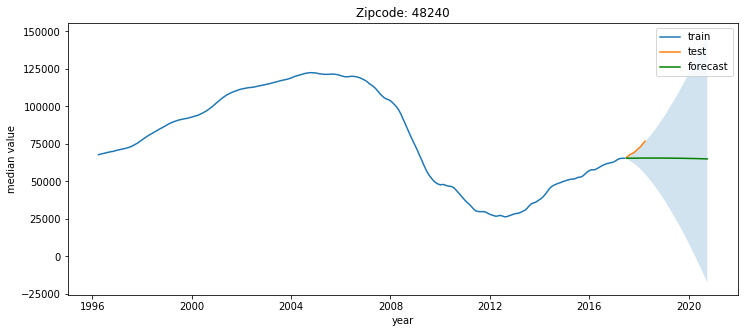

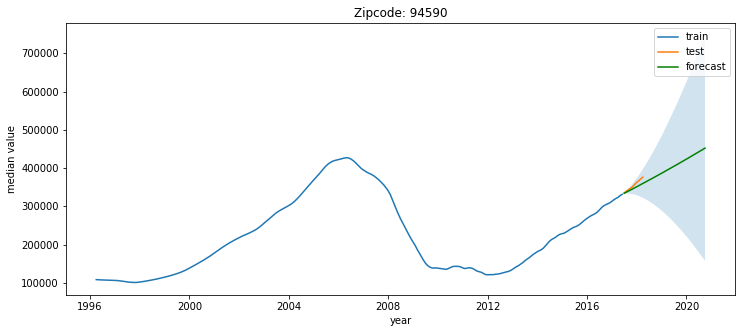

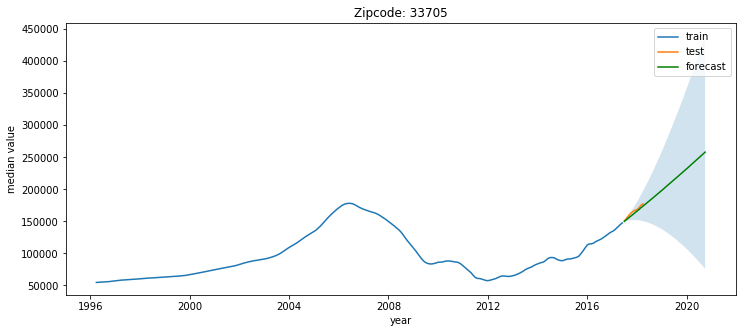

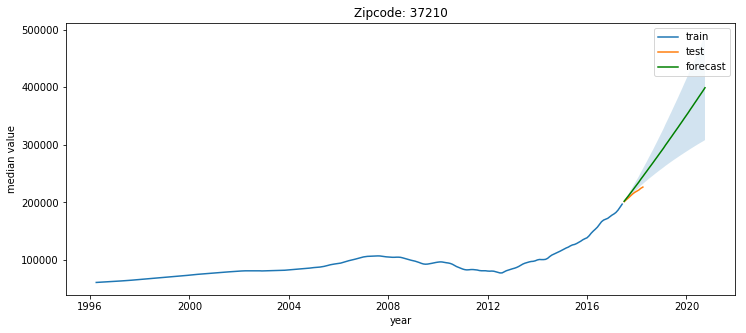

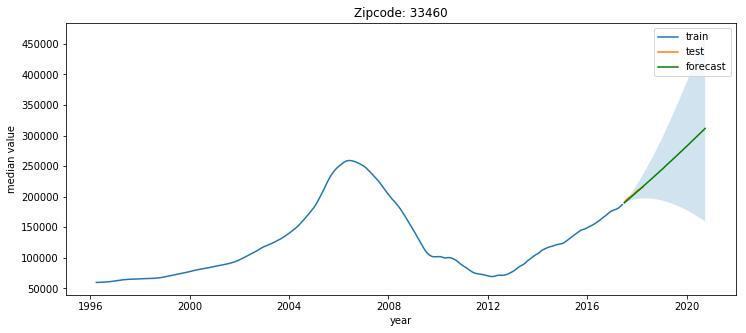

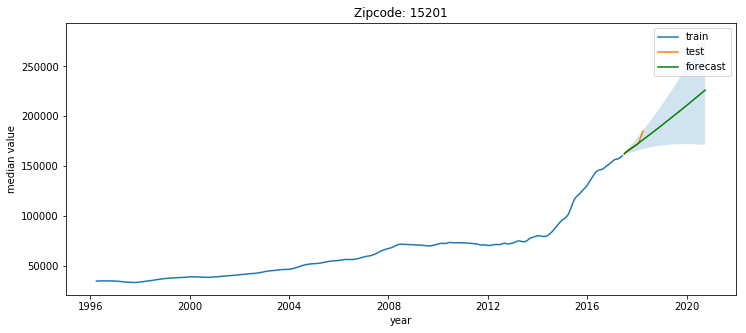

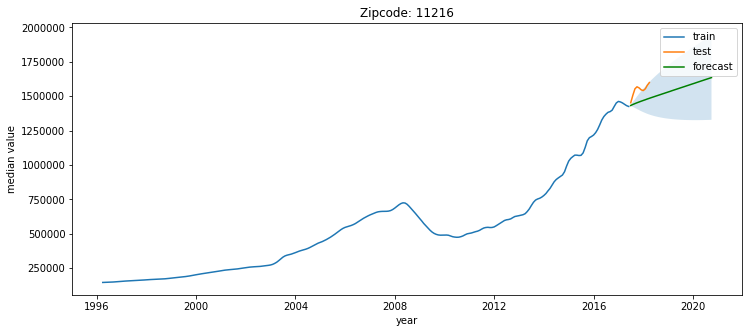

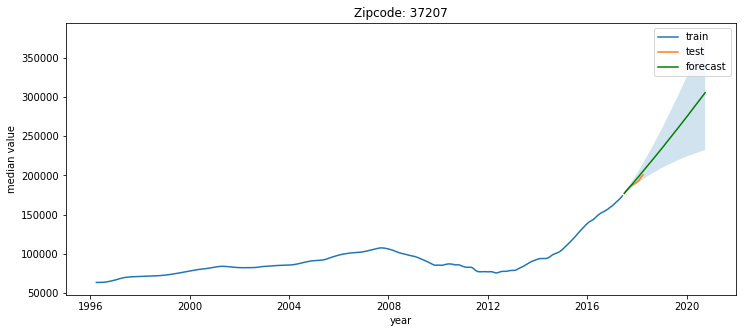

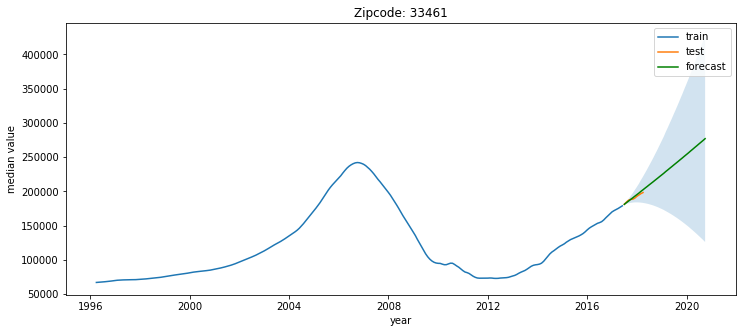

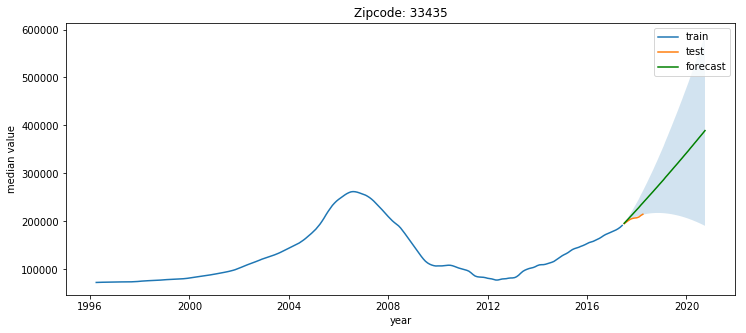

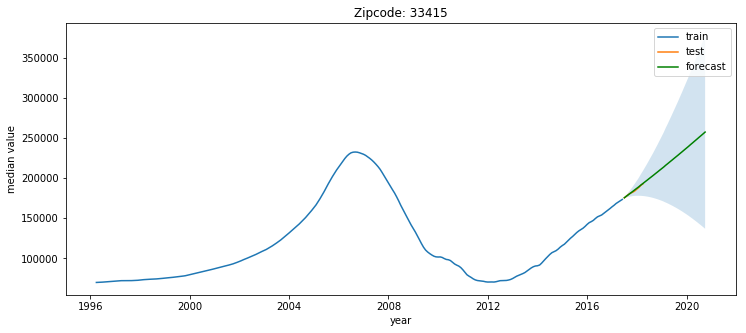

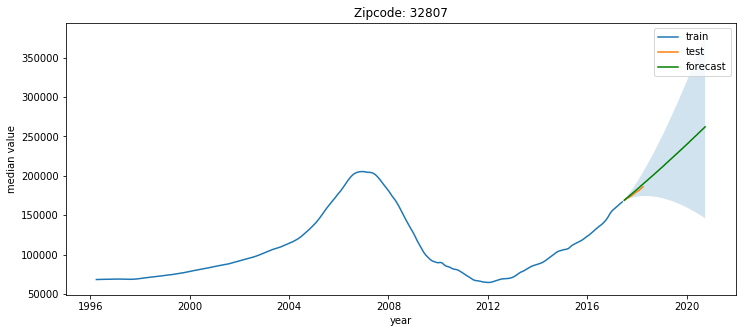

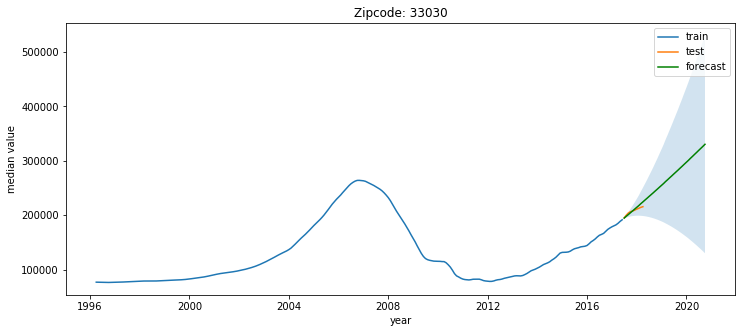

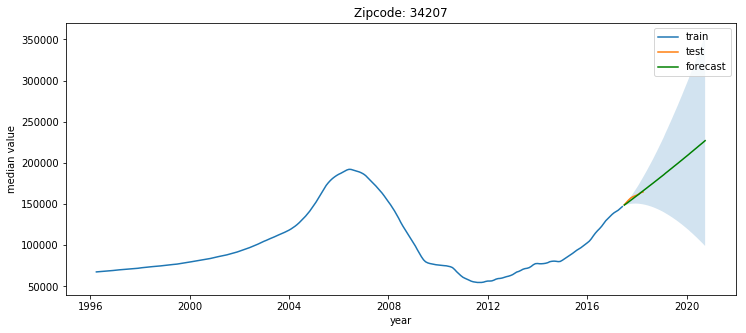

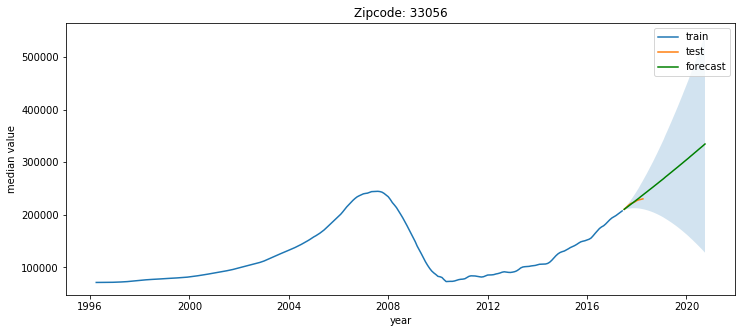

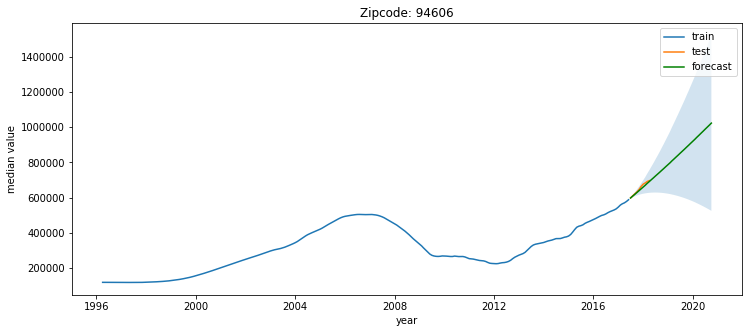

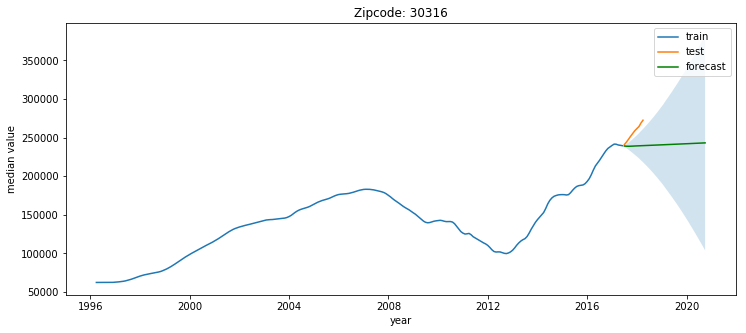

In [106]:
for key in zip_dict.keys():
    
    # plot train / test
    plt.figure(figsize=(12,5))
    plt.title('Zipcode: ' + str(key))
    plt.xlabel('year')
    plt.ylabel('median value')
    plt.plot(zip_dict[key]['train'], label='train')
    plt.plot(zip_dict[key]['test'], label='test')
    
    # perform forecasting
    fc, se, ci = zip_dict[key]['model'].forecast(40)
    zip_dict[key]['forecast'] = fc
    zip_dict[key]['conf'] = ci
    
    # plot forecast
    plt.fill_between(X, [c[0] for c in ci], [c[1] for c in ci], alpha=0.20)
    plt.plot(X, fc, color='green', label='forecast')
    plt.legend()
    plt.show()
    

#### Deturmining best five zipcodes

Now I look at the difference between future predictions and current values and find the five best zipcodes to invest in.

In [95]:
growth_dict = {}
growth_list = []
for key in zip_dict.keys():
    zip_dict[key]['growth'] = (zip_dict[key]['forecast'][-1] - zip_dict[key]['time_series'][-1]) / zip_dict[key]['time_series'][-1]
    growth_dict.update({zip_dict[key]['growth'] : key })
    growth_list.append(zip_dict[key]['growth'])
    

In [96]:
growth_list = sorted(growth_list, reverse=True)[:5]

In [97]:
top_five_zips = []
for z in growth_list:
    top_five_zips.append(growth_dict[z])

In [102]:
top_five_zips

[33435, 37210, 33030, 37207, 94606]

# Interpretation

We have the five best zipcodes to invest in. Lets have a look at the zipcodes and where they are located.

In [99]:
data = pd.read_csv('zillow_data.csv')

In [105]:
for z in top_five_zips:
    print(z)
    print(data[data.RegionName == z].City.values)
    print(data[data.RegionName == z].State.values)

33435
['Boynton Beach']
['FL']
37210
['Nashville']
['TN']
33030
['Homestead']
['FL']
37207
['Nashville']
['TN']
94606
['Oakland']
['CA']


# Conclusion

The top five zipcodes are in these cities and states.<br>
1) 33435 Boynton Beach FL <br>
2) 37210 Nashville TN <br>
3) 33030 Homestead FL <br>
4) 37207 Nashville TN <br>
5) 94606 Oakland CA

I would suggest investing in these zipcodes

# Future Work

Given more data and time I could deturmine which neighborhoods are the best to invest in. I could also deturmine which zip codes are bad to invest in.